# SP500 Prediction Analysis

Firstly I import the necessary libraries which for the moment are **yfinance**(this library allows us to get the historical data for a particular stock or stocks) and **pandas**(a common python library which makes our life a lot easier when dealing with data and dataframes)

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

Using the Ticker method from yfinance library I assign the GSPC which is the code name for SP500 in **Yahoo Finance** to the **sp500** varaible, and then set the history limit to maximum

In [3]:
# Retrieve S&P 500 data
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period="max")


We will see the historical data from the **sp500** since 1927 up to the current year

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,0.0,0.0
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,0.0,0.0
2023-06-15 00:00:00-04:00,4365.330078,4439.200195,4362.600098,4425.839844,4176690000,0.0,0.0


In [5]:
 sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-06 00:00:00-04:00', '2023-06-07 00:00:00-04:00',
               '2023-06-08 00:00:00-04:00', '2023-06-09 00:00:00-04:00',
               '2023-06-12 00:00:00-04:00', '2023-06-13 00:00:00-04:00',
               '2023-06-14 00:00:00-04:00', '2023-06-15 00:00:00-04:00',
               '2023-06-16 00:00:00-04:00', '2023-06-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23981, freq=None)

The folloing line of code plots the closing day price since the stock was made public. And as we can see we did miss out on a lot of money

<Axes: xlabel='Date'>

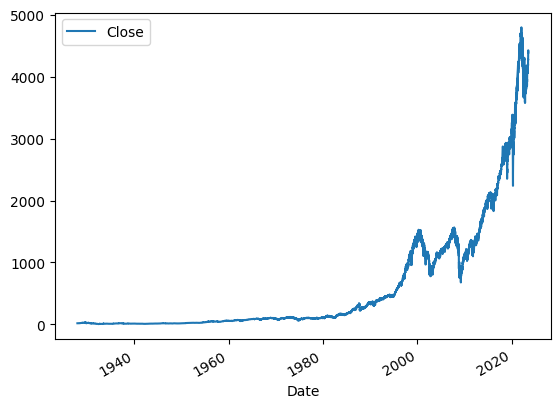

In [6]:
sp500.plot.line(y="Close", use_index=True)

I delete the columns named Dividends and Stock Splits since they are not relevant for our case, however if we want to track individual stocks such as INTEL or MICROSOFT those can be very valuable. 

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]
print(sp500.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


Let me explain the names of the columns. The column Open means what was the price on the first moment the market opened on that day, the High means the highest price during the whole day, the Low means the lowest price during the whole day, the Close means the price at the end of the day, and the Volume means how much trading volume was going on that particular day. Although the Volume column won't make much of a difference on our analysis we will keep it still 

We create another column which is called tomorrow and holds the value of the Close column of the next day. 

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) 

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844
2023-06-15 00:00:00-04:00,4365.330078,4439.200195,4362.600098,4425.839844,4176690000,4409.589844


Now we create yet another column which is called Target and its a boolean value on whether the Tomorrow value is bigger or not than the Today's value. We use type int, because is easier for usage on Machine Learning top work with intigers

In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844,1
2023-06-15 00:00:00-04:00,4365.330078,4439.200195,4362.600098,4425.839844,4176690000,4409.589844,0


For a couple of reasons such as the ".com" boom on the 90's and the low trading volume on tech, also the time efficency we use the subset since 1987.

In [11]:
sp500 = sp500.loc["1987-01-01":].copy()

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1987-01-02 00:00:00-05:00,242.169998,246.449997,242.169998,246.449997,91880000,252.190002,1
1987-01-05 00:00:00-05:00,246.449997,252.570007,246.449997,252.190002,181900000,252.779999,1
1987-01-06 00:00:00-05:00,252.199997,253.990005,252.139999,252.779999,189300000,255.330002,1
1987-01-07 00:00:00-05:00,252.779999,255.720001,252.649994,255.330002,190900000,257.279999,1
1987-01-08 00:00:00-05:00,255.360001,257.279999,254.970001,257.279999,194500000,258.730011,1
...,...,...,...,...,...,...,...
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844,1
2023-06-15 00:00:00-04:00,4365.330078,4439.200195,4362.600098,4425.839844,4176690000,4409.589844,0


In [12]:
print(sp500.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')


### Moving Average (MA) Model:
The Moving Average (MA) model is a simple and commonly used method for time series forecasting. It calculates the average of the past "n" observations to predict future values. 


<Axes: xlabel='Date'>

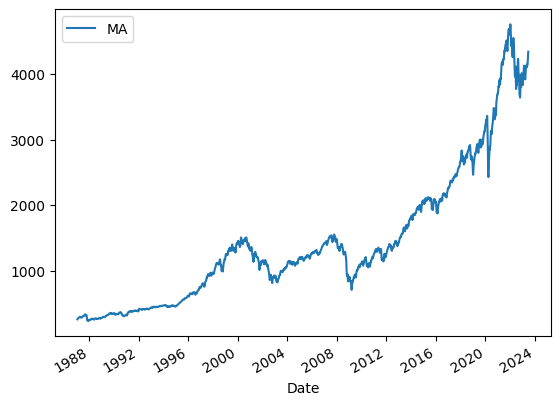

In [13]:
window_size = 10
sp500["MA"] = sp500['Close'].rolling(window=window_size).mean()
sp500.plot.line(y="MA", use_index=True)

In [14]:
last_ma = sp500["MA"].iloc[-1]  # Get the last moving average value
next_prediction = last_ma       # Consider it as the forecast for the next data point
print("Next prediction:", next_prediction)

Next prediction: 4344.882958984375


### Monte Carlo Simulation:

In [15]:
sp500['Log_Return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

mean_return = sp500['Log_Return'].mean()
std_return = sp500['Log_Return'].std()

num_simulations = 1000
num_days = 30
simulations = np.random.normal(mean_return, std_return, size=(num_simulations, num_days))

initial_price = sp500['Close'].iloc[-1]
simulated_prices = initial_price * np.exp(np.cumsum(simulations, axis=1))


In [16]:
# Assuming you have historical prices in the "sp500" dataframe and simulated prices in the "simulated_prices" array

# Get the actual prices for the specific period
actual_prices = sp500['Close'].tail(num_days)

# Calculate the accuracy percentage
accuracy_count = sum(simulated_prices[:, -1] >= actual_prices.iloc[-1])
accuracy_percentage = (accuracy_count / num_simulations) * 100

print("Accuracy percentage: {:.2f}%".format(accuracy_percentage))


Accuracy percentage: 57.20%


In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,MA,Log_Return
Date,,,,,,,,,
1987-01-02 00:00:00-05:00,242.169998,246.449997,242.169998,246.449997,91880000,252.190002,1,NaN,NaN
1987-01-05 00:00:00-05:00,246.449997,252.570007,246.449997,252.190002,181900000,252.779999,1,NaN,0.023024
1987-01-06 00:00:00-05:00,252.199997,253.990005,252.139999,252.779999,189300000,255.330002,1,NaN,0.002337
1987-01-07 00:00:00-05:00,252.779999,255.720001,252.649994,255.330002,190900000,257.279999,1,NaN,0.010037
1987-01-08 00:00:00-05:00,255.360001,257.279999,254.970001,257.279999,194500000,258.730011,1,NaN,0.007608
...,...,...,...,...,...,...,...,...,...
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1,4280.911035,0.006909
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844,1,4300.187012,0.000819
2023-06-15 00:00:00-04:00,4365.330078,4439.200195,4362.600098,4425.839844,4176690000,4409.589844,0,4320.668994,0.012105


### Autoregressive Integrated Moving Average (ARIMA) Model:

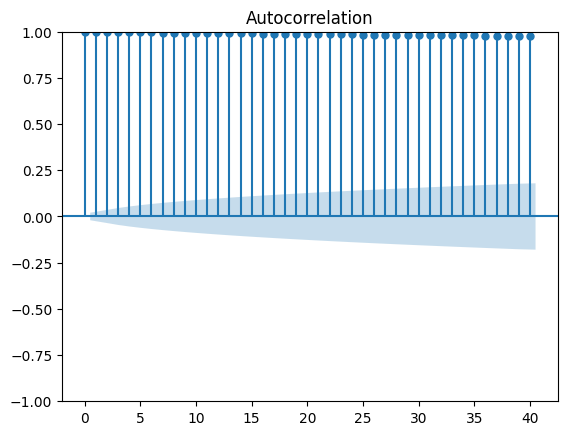

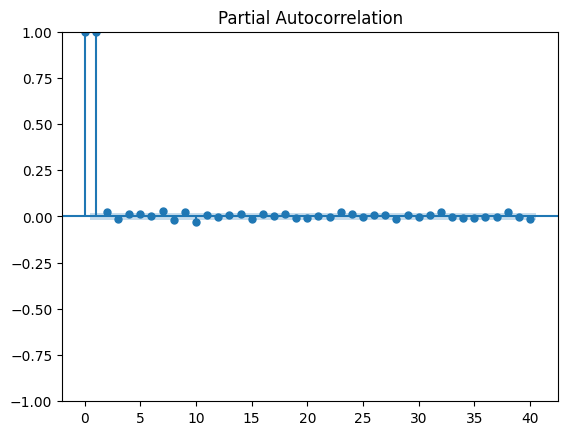

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(sp500['Close'])
plt.show()

# Plot PACF
plot_pacf(sp500['Close'])
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA
# Define the values for p, d, and q
p = 1  # Autoregressive order
d = 0  # Degree of differencing
q = 1  # Moving average order

# Create and fit the ARIMA model
model = ARIMA(sp500['Close'], order=(p, d, q))
arima_results = model.fit()

# Define the number of steps for forecasting
num_steps = 10

# Forecast future values
forecast = arima_results.forecast(steps=num_steps)

# Print the forecasted values
print(forecast)

/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

9189    4390.522591
9190    4390.392085
9191    4390.261584
9192    4390.131089
9193    4390.000600
9194    4389.870117
9195    4389.739640
9196    4389.609168
9197    4389.478702
9198    4389.348242
Name: predicted_mean, dtype: float64


/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Machine Learning:

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [20]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)


0.6190476190476191

<Axes: xlabel='Date'>

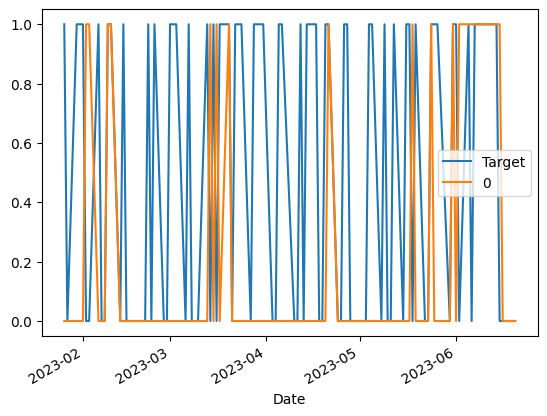

In [21]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()


In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [23]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [29]:
predictions = backtest(sp500, model, predictors)

In [31]:
predictions["Predictions"].value_counts()

0    3648
1    3041
Name: Predictions, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5317329825715226

In [33]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534011
0    0.465989
Name: Target, dtype: float64

In [34]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [35]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [36]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,MA,Log_Return,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1990-12-14 00:00:00-05:00,329.339996,329.339996,325.160004,326.820007,151010000,326.019989,0,327.887006,-0.007681,0.996159,0.0,0.995383,2.0,1.043037,31.0,0.974994,135.0,1.080731,559.0
1990-12-17 00:00:00-05:00,326.820007,326.820007,324.459991,326.019989,118560000,330.049988,1,328.079004,-0.002451,0.998775,0.0,0.994685,1.0,1.039671,31.0,0.972803,134.0,1.077822,558.0
1990-12-18 00:00:00-05:00,326.019989,330.429993,325.750000,330.049988,176460000,330.200012,1,328.449002,0.012285,1.006143,1.0,1.004767,2.0,1.051100,32.0,0.985001,134.0,1.090867,558.0
1990-12-19 00:00:00-05:00,330.040009,330.799988,329.390015,330.200012,180380000,330.119995,0,328.477002,0.000454,1.000227,2.0,1.005218,2.0,1.050355,32.0,0.985651,134.0,1.091093,558.0
1990-12-20 00:00:00-05:00,330.200012,330.739990,326.940002,330.119995,174700000,331.750000,1,328.582001,-0.000242,0.999879,1.0,1.004497,2.0,1.048707,32.0,0.985609,134.0,1.090566,557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1,4280.911035,0.006909,1.003454,2.0,1.012834,4.0,1.056589,35.0,1.097451,119.0,1.157602,535.0
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844,1,4300.187012,0.000819,1.000410,2.0,1.008749,5.0,1.055663,35.0,1.097707,119.0,1.158104,536.0
2023-06-15 00:00:00-04:00,4365.330078,4439.200195,4362.600098,4425.839844,4176690000,4409.589844,0,4320.668994,0.012105,1.006052,2.0,1.014857,5.0,1.066704,35.0,1.110229,120.0,1.171738,537.0


In [37]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
predictions = backtest(sp500, model, new_predictors)

In [40]:
predictions["Predictions"].value_counts()

0.0    4746
1.0     943
Name: Predictions, dtype: int64

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5418875927889714

In [43]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.535771
0    0.464229
Name: Target, dtype: float64

In [44]:
predictions

,Target,Predictions
Date,,
2000-11-06 00:00:00-05:00,0,1.0
2000-11-07 00:00:00-05:00,0,0.0
2000-11-08 00:00:00-05:00,0,0.0
2000-11-09 00:00:00-05:00,0,0.0
2000-11-10 00:00:00-05:00,0,1.0
...,...,...
2023-06-13 00:00:00-04:00,1,0.0
2023-06-14 00:00:00-04:00,1,0.0
2023-06-15 00:00:00-04:00,0,0.0


### Ensemble Model:

In [113]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Retrieve S&P 500 data
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period="max")

# Preprocessing and Feature Engineering
sp500["Tomorrow"] = sp500["Close"].shift(-1) 
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1993-01-01":].copy()
window_size = 10
sp500["MA"] = sp500['Close'].rolling(window=window_size).mean()
sp500['Log_Return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

# Model Ensemble
# ARIMA Model
p = 1  # Autoregressive order
d = 0  # Degree of differencing
q = 1  # Moving average order
model_arima = ARIMA(sp500['Close'], order=(p, d, q))
arima_results = model_arima.fit()

# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
predictors = ["Close", "Volume", "Open", "High", "Low"]
model_rf.fit(sp500[predictors], sp500["Target"])

# Combine Predictions
sp500["ARIMA_Predictions"] = arima_results.predict()
sp500["RF_Predictions"] = model_rf.predict_proba(sp500[predictors])[:, 1]
sp500["Combined_Predictions"] = (sp500["ARIMA_Predictions"] + sp500["RF_Predictions"]) / 2

# Convert target variable to binary classes
threshold = 0.5
sp500["Target_Class"] = (sp500["Target"] >= threshold).astype(int)
sp500["Combined_Predictions_Class"] = (sp500["Combined_Predictions"] >= threshold).astype(int)

# Model Evaluation
test = sp500[-100:]
combined_preds = sp500["Combined_Predictions_Class"][-100:]
precision = precision_score(test["Target_Class"], combined_preds)

print("Precision Score:", precision)



/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/feds/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

Precision Score: 0.53
